In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs
from matplotlib.animation import FuncAnimation
from matplotlib import colors

In [2]:
lmc = fits.open('LMC_ATCA+PKS_K.mir.bin (1).fits', ignore_missing_end=True)
lmc.info()
lmc[0].data.shape
data = lmc[0].data
lmc[0].header

Filename: LMC_ATCA+PKS_K.mir.bin (1).fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     262   (665, 743, 120)   float32   


SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                  665  /                                               
NAXIS2  =                  743  /                                               
NAXIS3  =                  120  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2000-01-01T12:00:00.0'  /                                            
TELESCOP= 'ATCA    '  /                                                         
CRPIX1  =    3.09000000000E+

In [3]:
lmc_wcs = wcs.WCS(lmc[0].header)
print(lmc_wcs)
lmc_wcs.axis_type_names

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'VOPT'  
CRVAL : 80.8945810822  -69.7394425038  190000.000354  
CRPIX : 309.0  329.333333333  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0166666674634  0.0166666674634  1649.00002256  
NAXIS : 665  743  120


['RA', 'DEC', 'VOPT']

In [4]:
lmcdata = lmc[0].data
lmcdata.shape
vopt_wcs = lmc_wcs.sub([3])
vopt_cdelt = vopt_wcs.wcs.cdelt
spatial_wcs = lmc_wcs.celestial

mean = np.mean(data)
data_edit = lmcdata #multiple outliers of -100K temps. Values replaced with average value of array
for i in range(len(data_edit)):
    for j in range(len(data_edit[i])):
        for k in range(len(data_edit[i,j])):
            if data_edit[i,j,k]<0:
                data_edit[i,j,k]=mean
                
total_intensity = np.trapz(y=data_edit, dx=vopt_cdelt, axis=0) #integrates accros all velocities to caluclate total intenisty

C:\Users\cam14\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


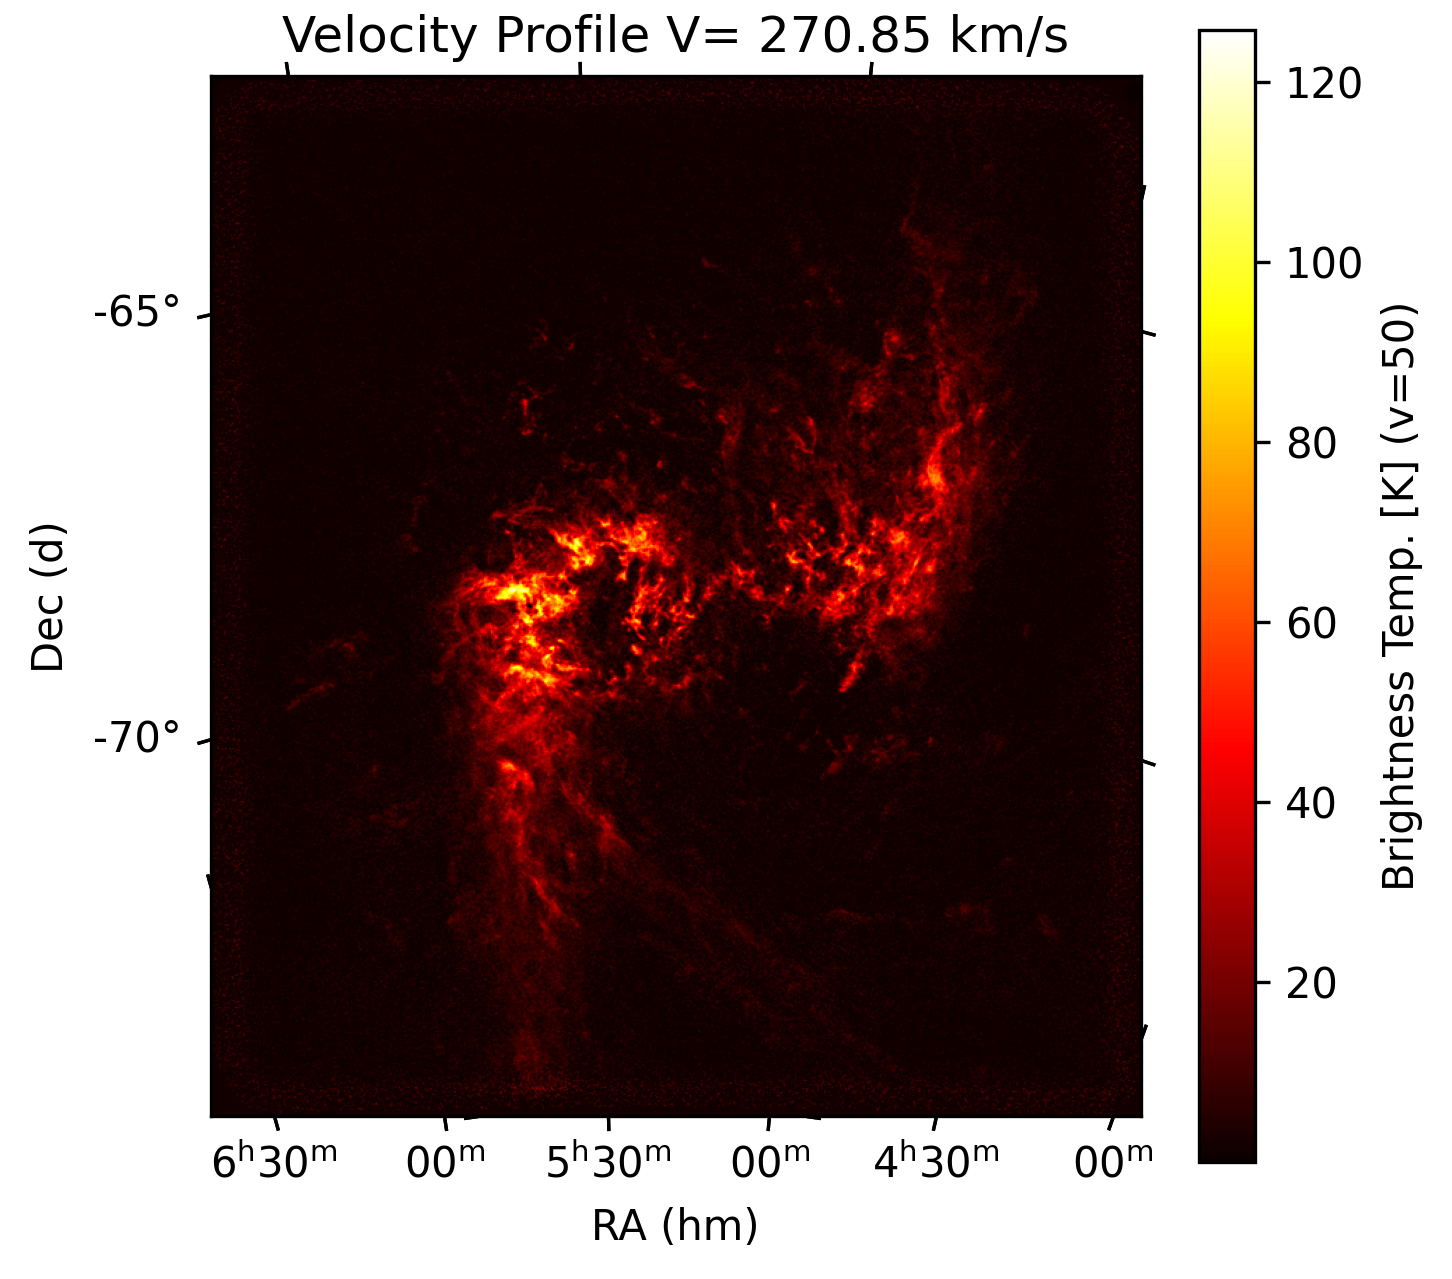

In [97]:
vchan = 50

fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot(projection=lmc_wcs, slices=('x', 'y', vchan))
im = ax.imshow(data_edit[vchan, :, :], origin='lower', cmap='hot')
ax.coords[0].set_axislabel('RA (hm)')
ax.coords[1].set_axislabel('Dec (d)')
cb = plt.colorbar(im, ax=ax)
cb.set_label('Brightness Temp. [K] (v={})'.format(vchan))
plt.title('Velocity Profile V= 270.85 km/s')
fig.show()
plt.savefig('LMC_vchan=50.jpeg')

C:\Users\cam14\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


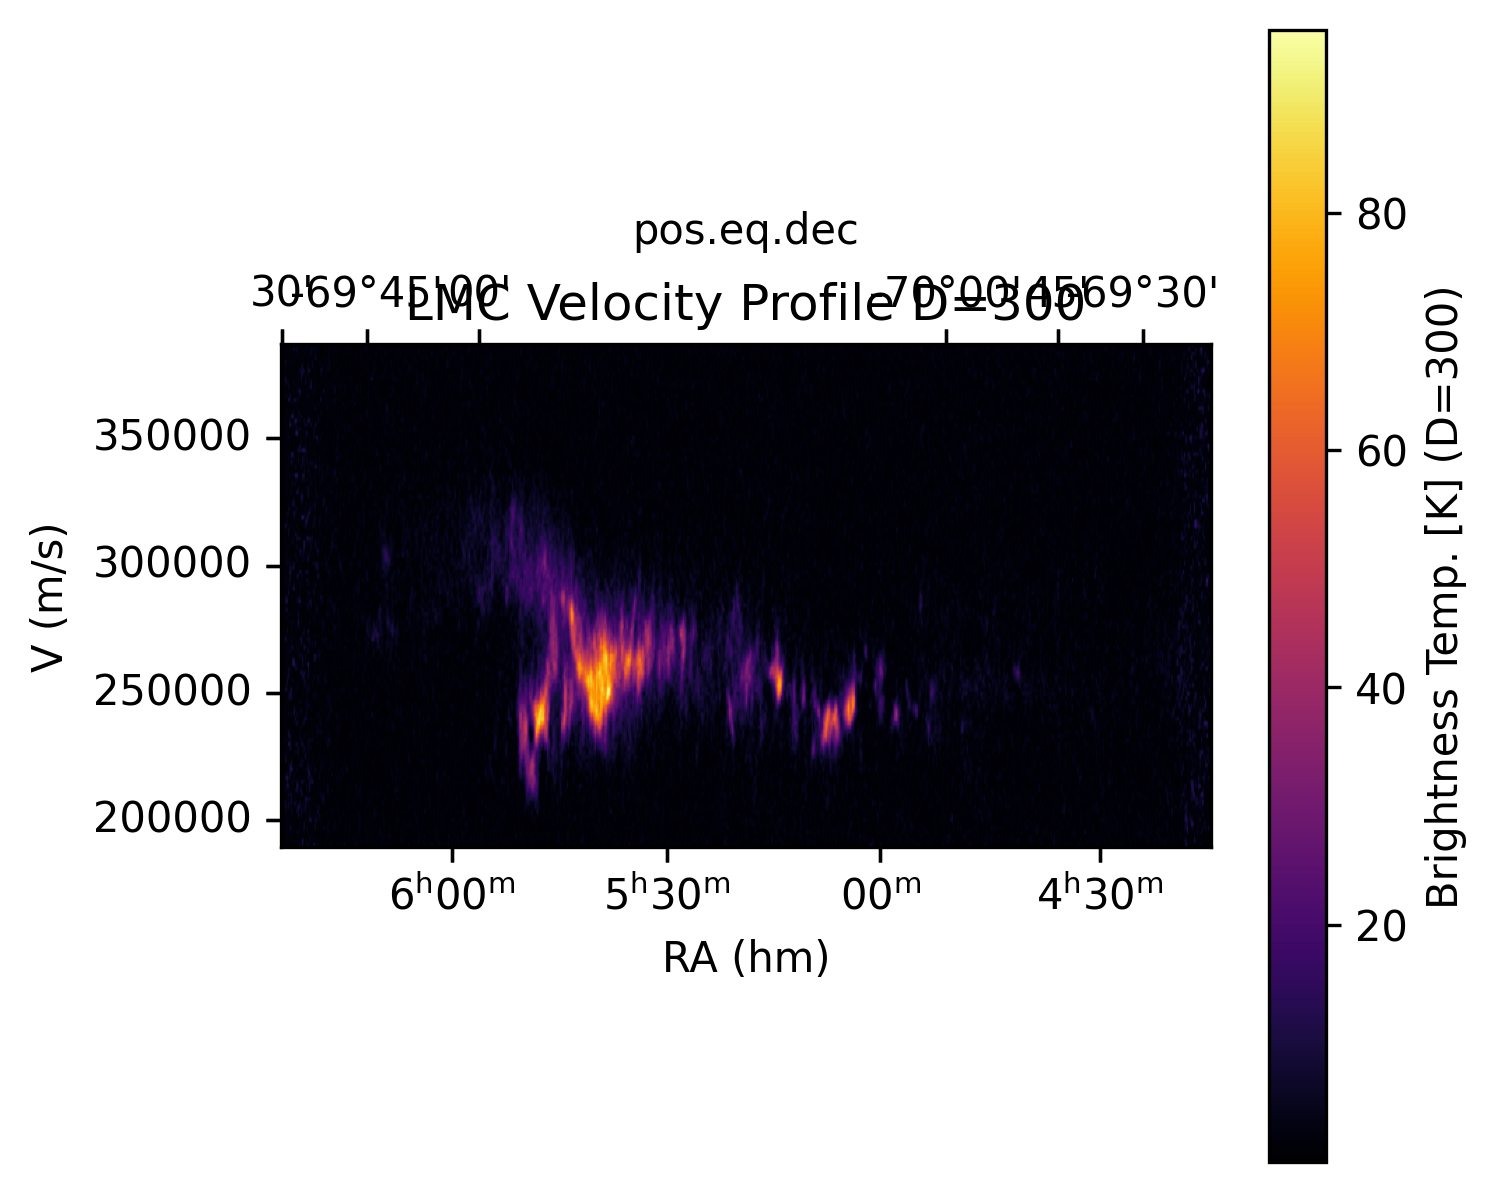

In [6]:
dchan = 300


fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot(projection=lmc_wcs, slices=('x', dchan, 'y'))
im = plt.imshow(lmc[0].data[:, dchan, :], origin='lower', aspect=3, cmap='inferno')
ax.coords[0].set_axislabel('RA (hm)')
ax.coords[2].set_axislabel('V (m/s)')
cb = plt.colorbar(im, ax=ax)
plt.title('LMC Velocity Profile D=300')
cb.set_label('Brightness Temp. [K] (D={})'.format(dchan))
fig.show()
plt.savefig('LMC_dchan=300.jpeg')


C:\Users\cam14\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


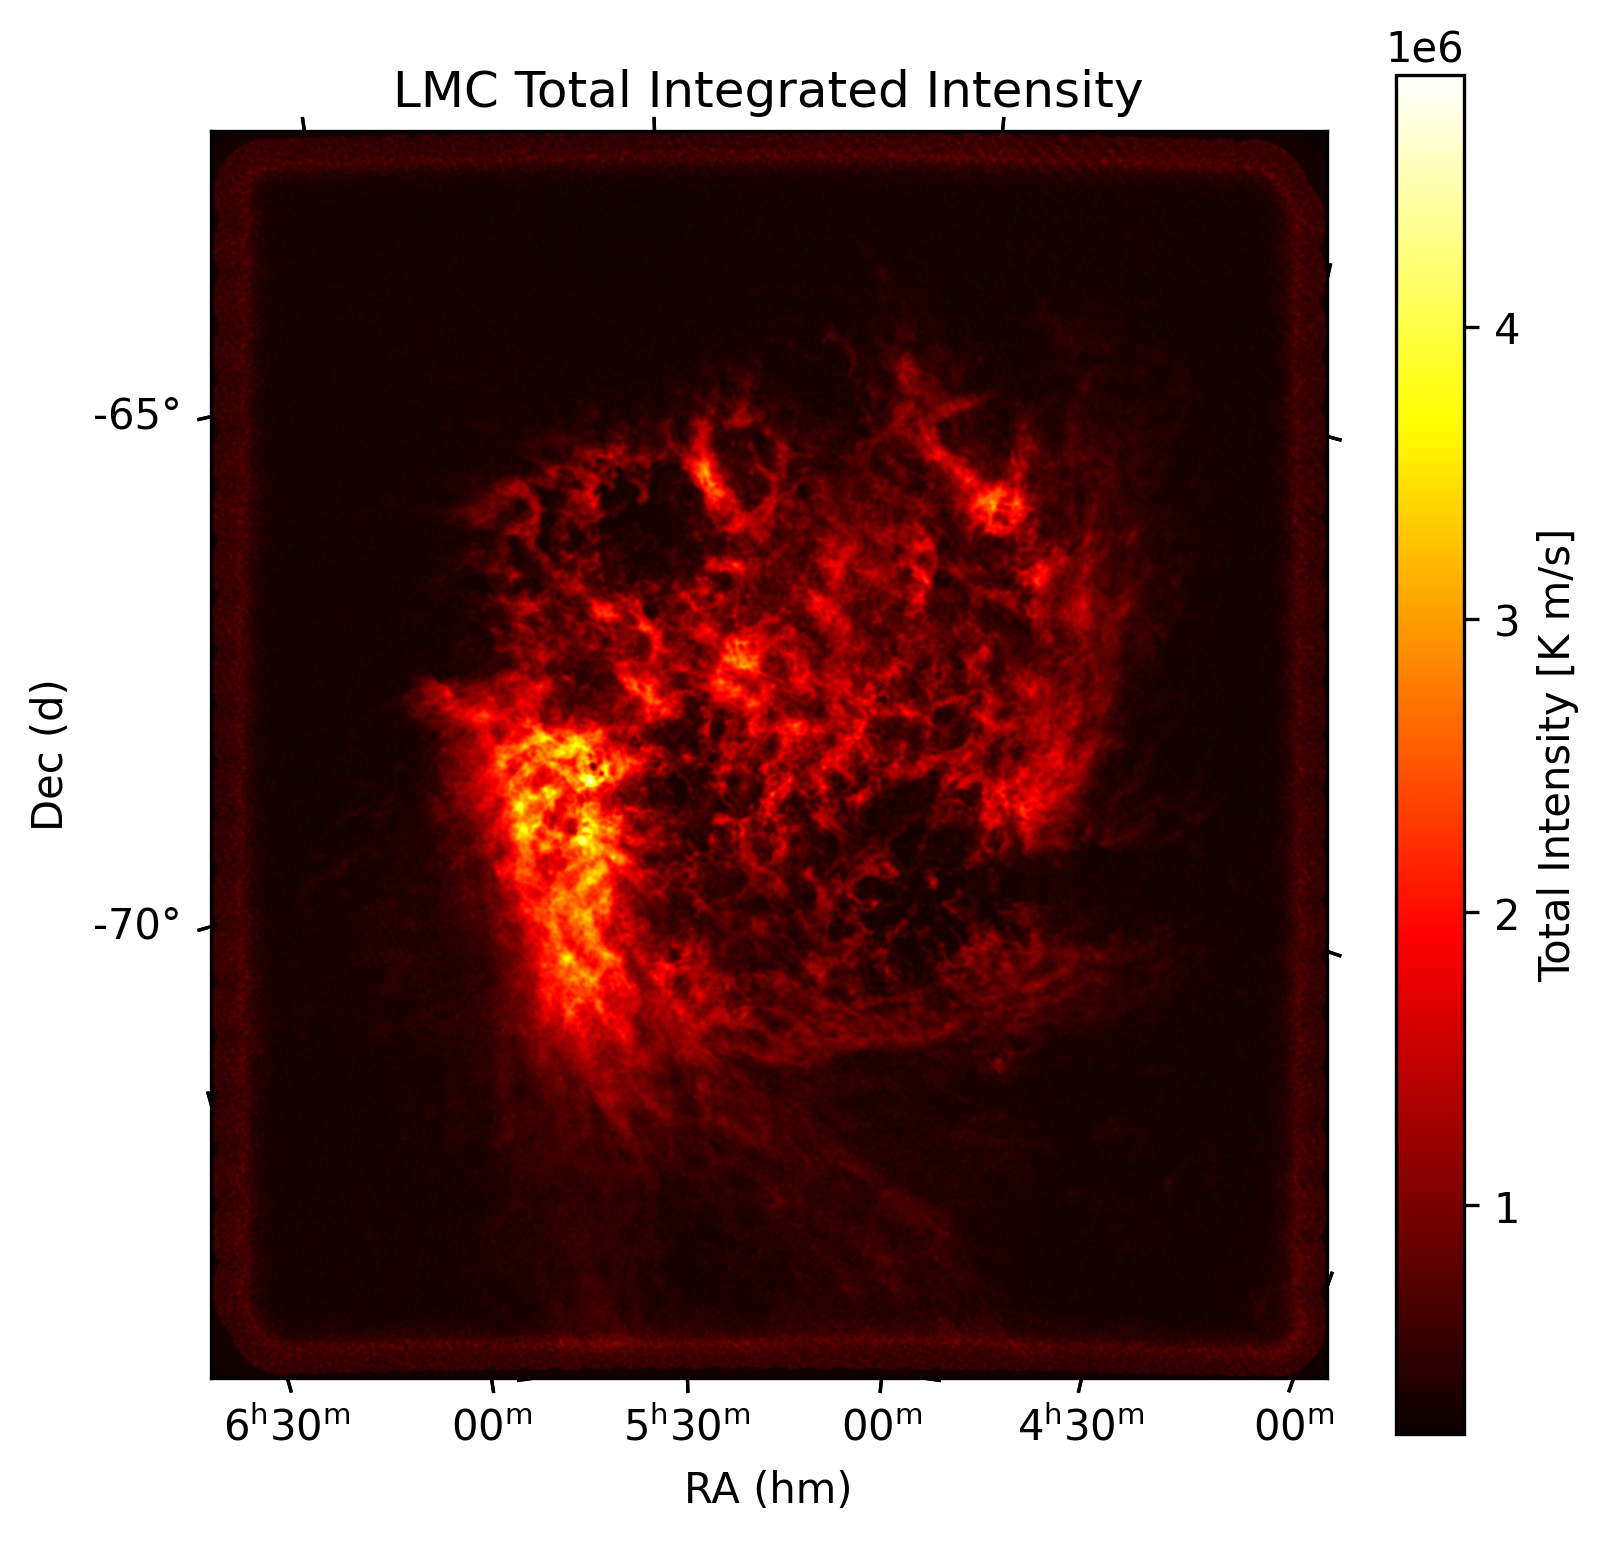

In [7]:
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = plt.subplot(projection=spatial_wcs, slices=('x', 'y'))
im = ax.imshow(total_intensity, origin='lower', cmap='hot',interpolation = "quadric")
ax.coords[0].set_axislabel('RA (hm)')
ax.coords[1].set_axislabel('Dec (d)')
cb = plt.colorbar(im, ax=ax)
cb.set_label('Total Intensity [K m/s]')
plt.title('LMC Total Integrated Intensity')
fig.show()
plt.savefig('LMC_Total_Intensity.jpeg')
plt.savefig('LMC_Total_Intensity.pdf')

In [8]:
spect1_x = np.empty([120])
for x in range(120):
    ind = (1.9*(10**5)+((1.65*10**3)*x))/1000
    spect1_x[x]= ind   

In [9]:
def integrate(i,j):
    top = np.trapz(y= spect1_x*data_edit[:,i,j], dx=vopt_cdelt, axis=0) #weighted average of velocity
    bot = np.trapz(y= data_edit[:,i,j], dx=vopt_cdelt, axis=0) #normalizes velocity with area under spectral curve
    return top/bot
vel_edit=np.empty([743,665]) #empty array to be filled with velocity values
for i in range(743):
    for j in range(665):
        vel_edit[i,j]=integrate(i,j)
for x in range(120):
    ind = (1.9*(10**5)+((1.65*10**3)*x))/1000
    spect1_x[x]= ind 

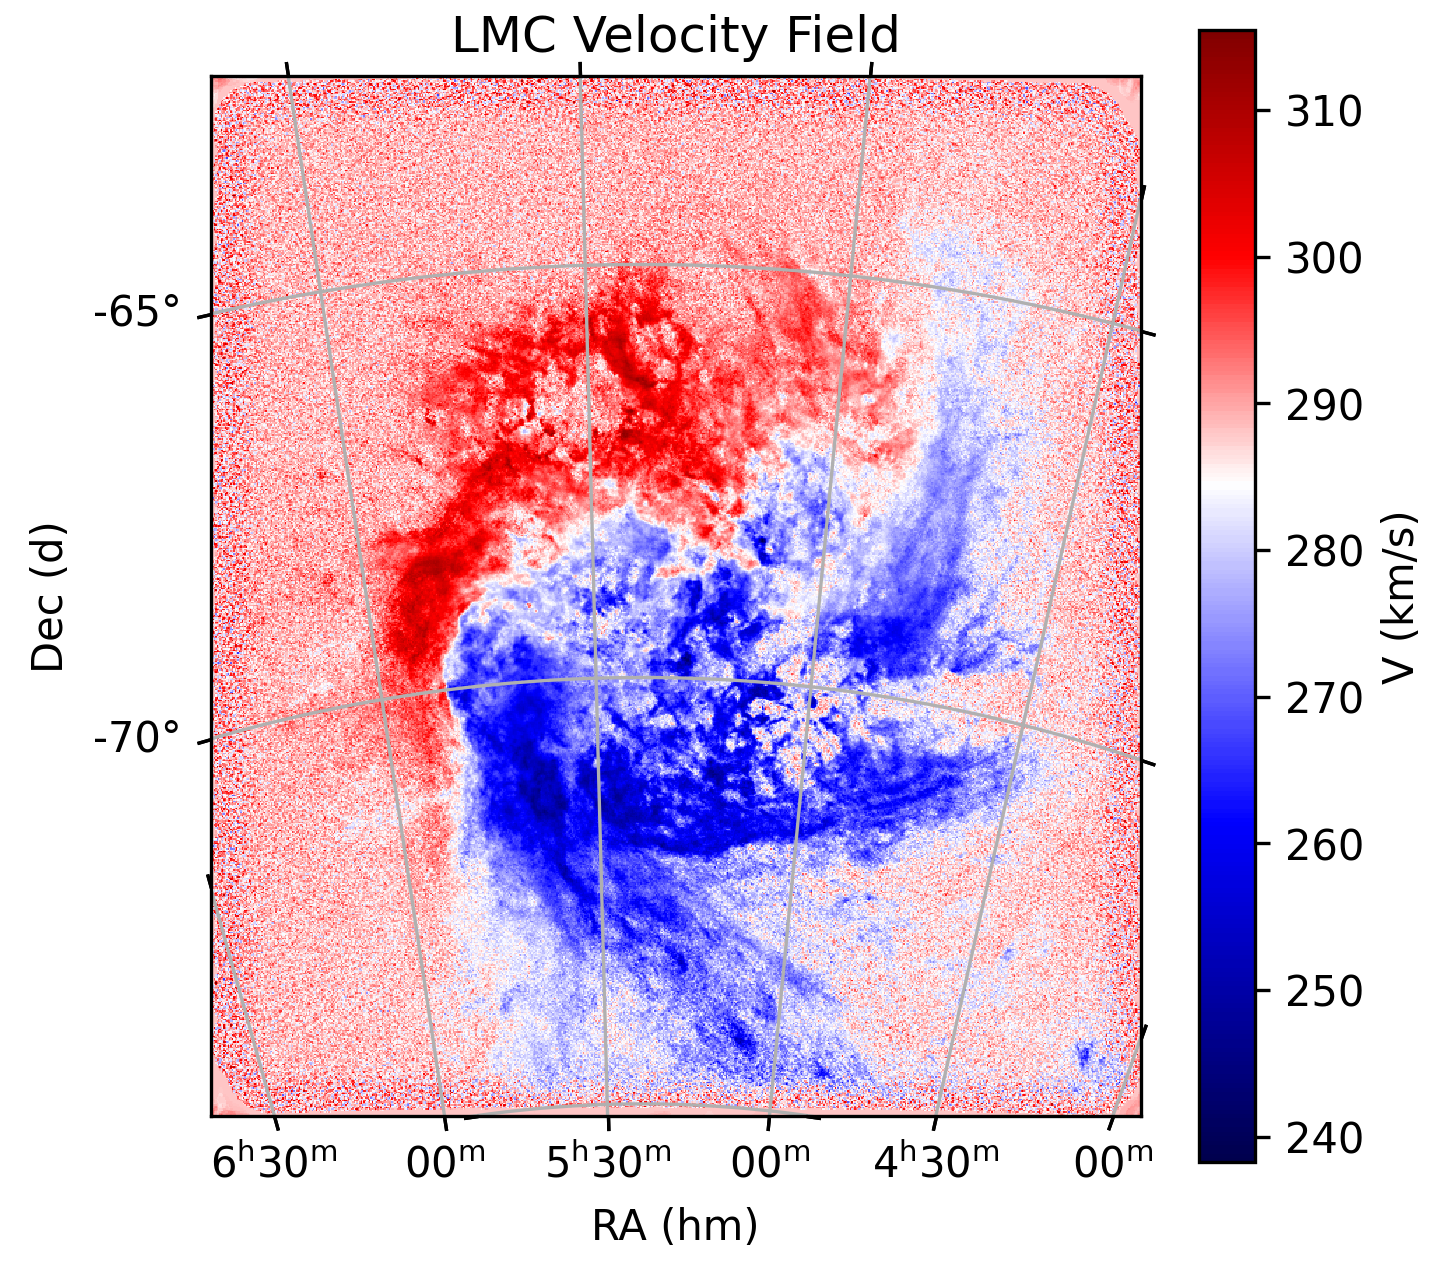

In [10]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = plt.subplot(projection=lmc_wcs, slices=('x', 'y', vchan))
ax.coords[0].set_axislabel('RA (hm)')
ax.coords[1].set_axislabel('Dec (d)')
divnorm=colors.TwoSlopeNorm(vmin=np.min(vel_edit), vcenter=np.mean(vel_edit), vmax=np.max(vel_edit))
pc = ax.pcolormesh(vel_edit, cmap="seismic", norm=divnorm)
im = plt.imshow(vel_edit,origin='lower')
cb = plt.colorbar(pc)
cb.set_label('V (km/s)')
plt.title('LMC Velocity Field')
plt.savefig('LMC_Rotation.jpeg')
plt.savefig('LMC_Rotation.pdf')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


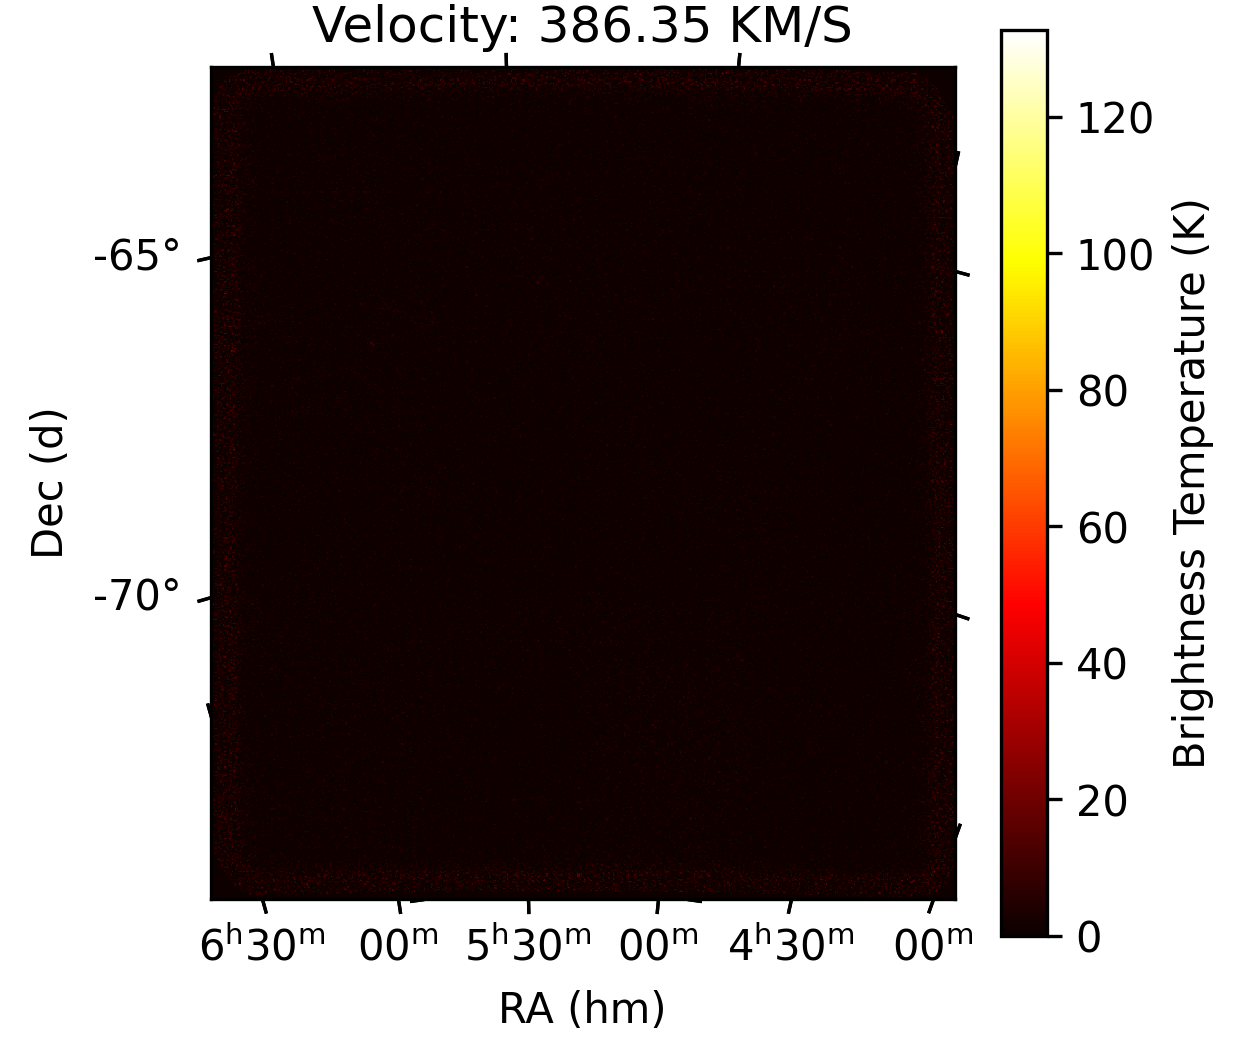

In [11]:
#animated gif highlighting which regions are moving at given velocity
fig_vel = plt.figure(figsize=(4,4),dpi=300)
ax = plt.subplot(projection=spatial_wcs, slices=('x', 'y'))
arr = np.zeros(data[1].shape)
ax.coords[0].set_axislabel('RA (hm)')
ax.coords[1].set_axislabel('Dec (d)')
im=plt.imshow(arr, interpolation='nearest',cmap='hot',vmax=np.max(data),
              origin='lower', animated=True)
cb = plt.colorbar()
cb.set_label('Brightness Temperature (K)')
def update_title(i):
    current_vel = np.round((1.9*(10**5)+((1.65*10**3)*i))/1000,2)
    return current_vel

def animate_vel(i):
    arr = data_edit[i]
    im.set_array(arr)
    ax.set_title(("Velocity: {} KM/S").format(update_title(i)))
    return [im]
anim_vel = FuncAnimation(fig_vel, animate_vel, frames=len(data), interval=75, blit=True)
anim_vel.save('Velocity.gif',writer='imagemagick')

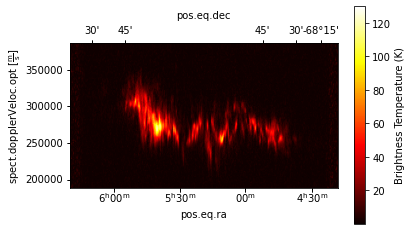

In [12]:
ax = plt.subplot(projection=lmc_wcs, slices=('x', 375, 'y'))
plt.imshow(data_edit[:,375,:],cmap= 'hot',origin = 'lower',aspect=3)
cb = plt.colorbar()
cb.set_label('Brightness Temperature (K)')
plt.savefig('Dec375.jpeg')
plt.savefig('Dec375.pdf')

MovieWriter imagemagick unavailable; using Pillow instead.


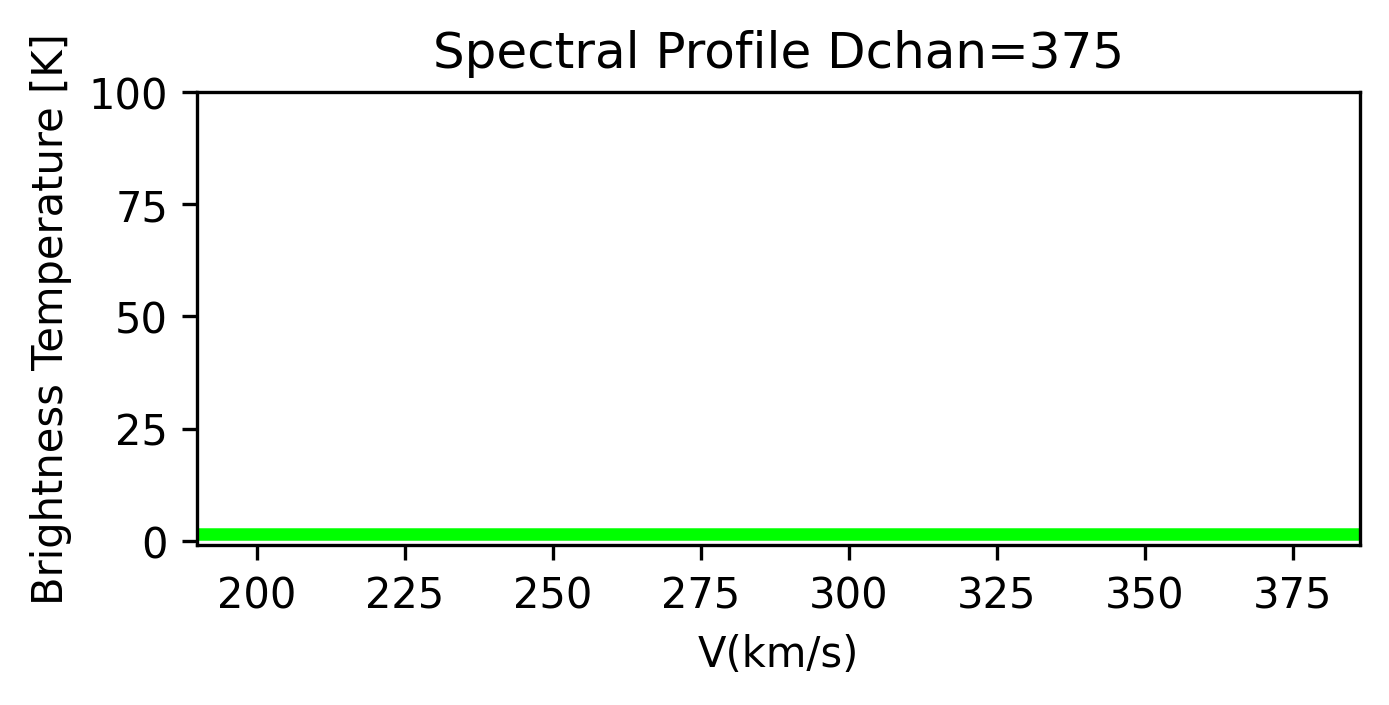

In [13]:
fig_spec = plt.figure(figsize=(5,2), dpi=300)
axis = plt.axes(xlim= (np.min(spect1_x),np.max(spect1_x)), ylim= (-1,100) )
line, = axis.plot([], [], lw = 3, color='lime')
plt.ylabel('Brightness Temperature [K]')
plt.xlabel('V(km/s)')
plt.title('Spectral Profile Dchan=375')
def spec_animate(i):
    x = spect1_x
    y = lmcdata[:,375,664-i]
    line.set_data(x, y)
      
    return line,
   
anim_spec = FuncAnimation(fig_spec, spec_animate,frames = len(lmcdata[1,375]), interval = 75, blit = True)
  
   
anim_spec.save('Spectrum.gif',writer='imagemagick')

(743, 665)


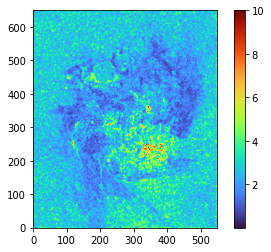

In [115]:
print(np.shape(vel_edit))
grads = np.gradient(vel_edit[50:700,50:600])
grad = np.sqrt(grads[0]**2+grads[1]**2)
plt.imshow(grad,cmap='turbo',interpolation='gaussian',vmax=10,origin='lower')
cbar = plt.colorbar()